In [1]:
# --- Imports ---
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.colors import ListedColormap

# --- Helper Functions ---
def find_symbol(matrix, symbol):
    """Locate the (row, col) of a given symbol inside the grid."""
    for row_idx, row in enumerate(matrix):
        for col_idx, val in enumerate(row):
            if val == symbol:
                return (row_idx, col_idx)
    return None

def manhattan_distance(p1, p2):
    """Compute Manhattan (L1) distance."""
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def valid_neighbors(matrix, r, c):
    """Generate walkable neighbors (no walls)."""
    directions = [(-1,0), (1,0), (0,-1), (0,1)]
    for dr, dc in directions:
        nr, nc = r + dr, c + dc
        if 0 <= nr < len(matrix) and 0 <= nc < len(matrix[0]) and matrix[nr][nc] != 1:
            yield (nr, nc)

def astar_solver(matrix, heuristic):
    """A* search with custom heuristic."""
    start = find_symbol(matrix, 'A')
    goal = find_symbol(matrix, 'B')
    if start is None or goal is None:
        raise ValueError("Grid missing 'A' (start) or 'B' (goal).")

    g_costs = {start: 0}
    parent = {start: None}
    open_heap = [(heuristic(start), 0, start)]
    order = 0
    visited = set()

    while open_heap:
        f_val, _, current = heapq.heappop(open_heap)
        if current in visited:
            continue
        if current == goal:
            # reconstruct path
            route = []
            node = current
            while node is not None:
                route.append(node)
                node = parent[node]
            return list(reversed(route)), g_costs[current]
        visited.add(current)

        for nxt in valid_neighbors(matrix, *current):
            step_cost = g_costs[current] + 1
            if nxt not in g_costs or step_cost < g_costs[nxt]:
                g_costs[nxt] = step_cost
                parent[nxt] = current
                order += 1
                heapq.heappush(open_heap, (step_cost + heuristic(nxt), order, nxt))
    return None, math.inf

def uniform_cost(matrix):
    """Uniform Cost Search: return shortest path cost."""
    start = find_symbol(matrix, 'A')
    goal = find_symbol(matrix, 'B')
    if start is None or goal is None:
        raise ValueError("Grid missing 'A' or 'B'.")

    pq = [(0, start)]
    dist = {start: 0}

    while pq:
        cost, node = heapq.heappop(pq)
        if node == goal:
            return cost
        for nb in valid_neighbors(matrix, *node):
            new_cost = cost + 1
            if nb not in dist or new_cost < dist[nb]:
                dist[nb] = new_cost
                heapq.heappush(pq, (new_cost, nb))
    return math.inf

def visualize_grid(matrix, path=None, title="Grid World"):
    """Plot maze with optional path overlay."""
    cmap = ListedColormap(['white', 'blue', 'green', 'red'])
    encoded = []
    for r in range(len(matrix)):
        row_vals = []
        for c in range(len(matrix[0])):
            if matrix[r][c] == 1:
                row_vals.append(0)   # wall
            elif matrix[r][c] == 'A':
                row_vals.append(2)   # start
            elif matrix[r][c] == 'B':
                row_vals.append(3)   # goal
            else:
                row_vals.append(1)   # free
        encoded.append(row_vals)
    encoded = np.array(encoded)

    plt.figure(figsize=(5,5))
    plt.imshow(encoded, cmap=cmap, interpolation='nearest', vmin=0, vmax=3)
    if path:
        y_coords = [p[1] for p in path]
        x_coords = [p[0] for p in path]
        plt.plot(y_coords, x_coords, color='red', linewidth=2)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# --- Example Map ---
maze_layout = [
    [0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    ['A', 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 'B'],
]

start_pos = find_symbol(maze_layout, 'A')
goal_pos  = find_symbol(maze_layout, 'B')
print("Start:", start_pos, "Goal:", goal_pos)


Start: (2, 0) Goal: (4, 5)


Baseline Manhattan (L1)
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


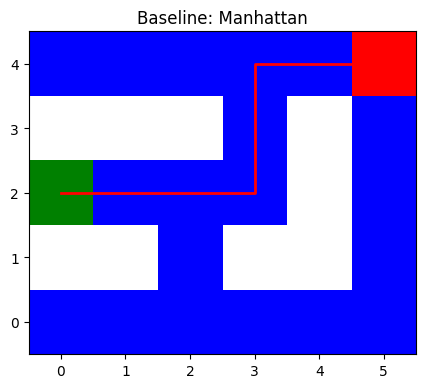

In [2]:
# --- Case 0: Baseline Manhattan (L1) Heuristic ---
goal_pos = find_symbol(maze_layout, 'B')

heuristic_base = lambda node: manhattan_distance(node, goal_pos)

path_case0, cost_case0 = astar_solver(maze_layout, heuristic_base)
optimal_cost = uniform_cost(maze_layout)

print("Baseline Manhattan (L1)")
print("Path:", path_case0)
print("Cost:", cost_case0)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case0 == optimal_cost)

visualize_grid(maze_layout, path_case0, title="Baseline: Manhattan")


Heuristic: 1.5 × Manhattan
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


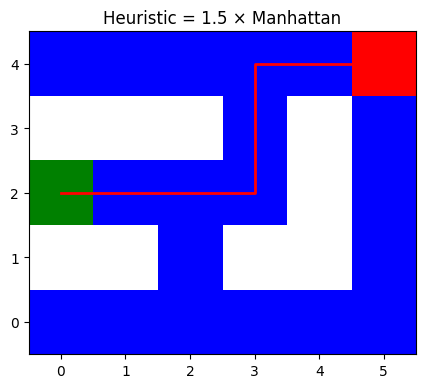

In [3]:
# --- Case 1: Weighted Manhattan (1.5 × L1) ---
heuristic_w15 = lambda node: 1.5 * manhattan_distance(node, find_symbol(maze_layout, 'B'))

path_case1, cost_case1 = astar_solver(maze_layout, heuristic_w15)
optimal_cost = uniform_cost(maze_layout)

print("Heuristic: 1.5 × Manhattan")
print("Path:", path_case1)
print("Cost:", cost_case1)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case1 == optimal_cost)

visualize_grid(maze_layout, path_case1, title="Heuristic = 1.5 × Manhattan")


Heuristic: 2 × Manhattan
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


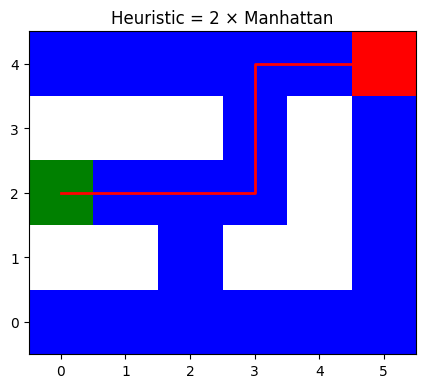

In [4]:
# --- Case 2: Weighted Manhattan (2 × L1) ---
heuristic_w2 = lambda node: 2 * manhattan_distance(node, find_symbol(maze_layout, 'B'))

path_case2, cost_case2 = astar_solver(maze_layout, heuristic_w2)
optimal_cost = uniform_cost(maze_layout)

print("Heuristic: 2 × Manhattan")
print("Path:", path_case2)
print("Cost:", cost_case2)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case2 == optimal_cost)

visualize_grid(maze_layout, path_case2, title="Heuristic = 2 × Manhattan")


Heuristic: 0.5 × Manhattan
Path: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5)]
Cost: 7
Optimal Cost: 7 | Optimal?: True


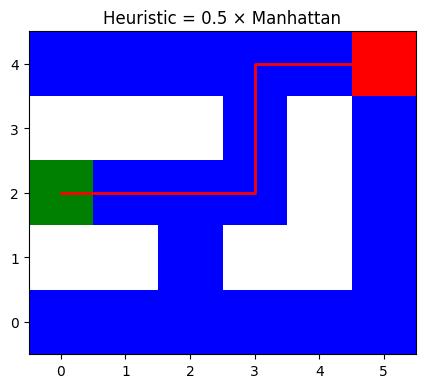

In [5]:
# --- Case 3: Weighted Manhattan (0.5 × L1) ---
heuristic_w05 = lambda node: 0.5 * manhattan_distance(node, find_symbol(maze_layout, 'B'))

path_case3, cost_case3 = astar_solver(maze_layout, heuristic_w05)
optimal_cost = uniform_cost(maze_layout)

print("Heuristic: 0.5 × Manhattan")
print("Path:", path_case3)
print("Cost:", cost_case3)
print("Optimal Cost:", optimal_cost, "| Optimal?:", cost_case3 == optimal_cost)

visualize_grid(maze_layout, path_case3, title="Heuristic = 0.5 × Manhattan")


In [6]:
# --- Admissibility Checks for Different Heuristics ---
goal_pos = find_symbol(maze_layout, 'B')

def verify_admissibility(matrix, heuristic_func):
    """Check if heuristic never overestimates the true shortest cost."""
    from collections import deque
    
    rows, cols = len(matrix), len(matrix[0])
    INF = 10**9
    dist_grid = [[INF] * cols for _ in range(rows)]
    
    gr, gc = goal_pos
    dq = deque([(gr, gc)])
    dist_grid[gr][gc] = 0

    # BFS from goal to compute exact shortest distances
    while dq:
        r, c = dq.popleft()
        for nr, nc in valid_neighbors(matrix, r, c):
            if dist_grid[nr][nc] > dist_grid[r][c] + 1:
                dist_grid[nr][nc] = dist_grid[r][c] + 1
                dq.append((nr, nc))

    admissible = True
    overestimates = []

    for r in range(rows):
        for c in range(cols):
            if matrix[r][c] != 1:  # not a wall
                h_val = heuristic_func((r, c))
                true_val = dist_grid[r][c]
                if true_val == INF:
                    continue  # unreachable
                if h_val > true_val + 1e-9:
                    admissible = False
                    overestimates.append(((r, c), h_val, true_val))

    return admissible, overestimates

# --- Run checks on each heuristic ---
adm_case0, viol_case0 = verify_admissibility(maze_layout, heuristic_base)
adm_case1, viol_case1 = verify_admissibility(maze_layout, heuristic_w15)
adm_case2, viol_case2 = verify_admissibility(maze_layout, heuristic_w2)
adm_case3, viol_case3 = verify_admissibility(maze_layout, heuristic_w05)

print("Admissible (Manhattan)?", adm_case0, "violations:", viol_case0[:3])
print("Admissible (1.5× Manhattan)?", adm_case1, "violations (first 3):", viol_case1[:3])
print("Admissible (2× Manhattan)?", adm_case2, "violations (first 3):", viol_case2[:3])
print("Admissible (0.5× Manhattan)?", adm_case3, "violations (first 3):", viol_case3[:3])


Admissible (Manhattan)? True violations: []
Admissible (1.5× Manhattan)? False violations (first 3): [((0, 0), 13.5, 9), ((0, 1), 12.0, 8), ((0, 2), 10.5, 7)]
Admissible (2× Manhattan)? False violations (first 3): [((0, 0), 18, 9), ((0, 1), 16, 8), ((0, 2), 14, 7)]
Admissible (0.5× Manhattan)? True violations (first 3): []
